# 🎯 Credit Risk Prediction – Machine Learning Project

## 📌 Problem Statement

Credit risk prediction is a critical task in the banking and financial services industry. Financial institutions provide loans to customers with the expectation that they will repay the borrowed amount on time. However, some borrowers fail to meet their repayment obligations, leading to loan defaults and financial losses.
This project aims to build a machine learning model that can predict whether a borrower is likely to default on a loan based on their financial and demographic information. By identifying high-risk borrowers in advance, lenders can make informed loan approval decisions, reduce potential losses, and improve overall risk management.

---

### 🧠 Problem Type: Classification
### 🎯 Target Variable: Loan Status (Default / Non-Default)
- 1 → Default (High Credit Risk)
- 0 → Non-Default (Low Credit Risk)
### ⚙️ Approach: Supervised Machine Learning

---

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("data/application_train.csv")

In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 📐 Dataset Shape

In [3]:
df.shape

(307511, 122)

### 🏷️ Target Variable Overview

In [4]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [5]:
df['TARGET'].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### 🧾 Feature Types Identification

In [6]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

### 📊 Numerical vs Categorical Features

In [7]:
numerical_features = df.select_dtypes(include =['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

len(numerical_features), len(categorical_features)

(106, 16)

### ❓ Missing Values Overview

In [8]:
missing_values = df.isnull().mean().sort_values(ascending=False)
missing_values.head(10)

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
dtype: float64

## 2. Data Cleaning & Preprocessing

### Separate Target & Features

In [9]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

print(X.shape, y.shape)

(307511, 121) (307511,)


### Identify Feature Types

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical features: {len(categorical_cols)}")
print(f"Numerical features: {len(numerical_cols)}")

Categorical features: 16
Numerical features: 105


### 🧮 Numerical Features – Median Imputation

In [12]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

### 🏷️ Categorical Features – Most Frequent Imputation

In [14]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

### Encode Categorical Variables

In [16]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train–Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## 3. Exploratory Data Analysis (EDA)

### Numerical Features vs TARGET

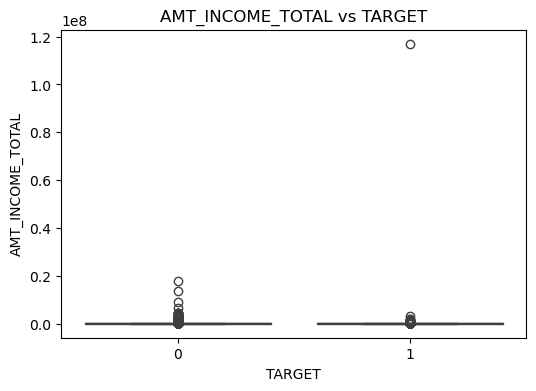

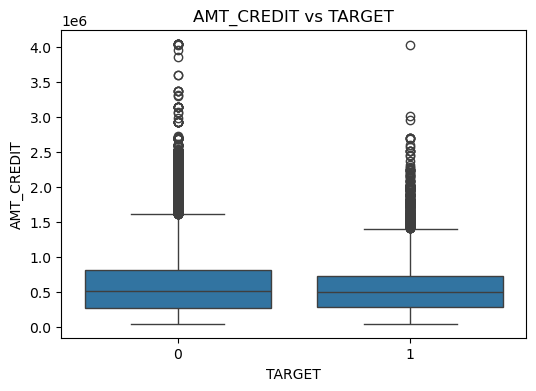

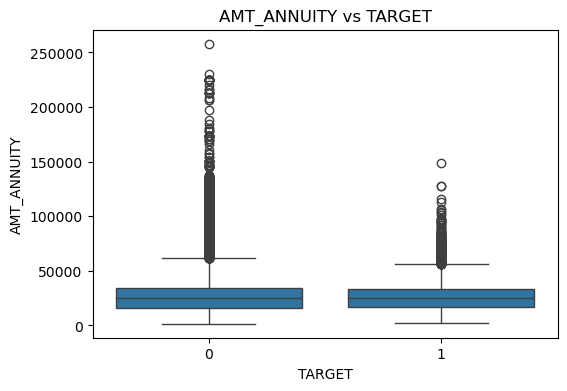

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features_sample = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for col in num_features_sample:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=df[col])
    plt.title(f"{col} vs TARGET")
    plt.show()